In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib .pyplot as plt
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')
import IPython.display as ipd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
import soundfile as sf
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D,LSTM
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D,GlobalAveragePooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras
from livelossplot.keras import PlotLossesCallback
from sklearn import svm



import tensorflow as tf
print("Tensorflow version:", tf.__version__)


Tensorflow version: 2.7.0


In [7]:
paths = []
labels = []

for dirname, _, filenames in os.walk('D:\speech_data1\Audio Dataset\Audio Dataset'):
    
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        labels.append(filename.replace(filename,dirname))
        
         

In [8]:
labels[:5]

['D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Angry',
 'D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Angry',
 'D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Angry',
 'D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Angry',
 'D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Angry']

In [9]:
mainlabels = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Angry', 'Angry'), labels))
mainlabels1 = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Disgust', 'Disgust'), mainlabels))
mainlabels2 = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Fear', 'Fear'), mainlabels1))
mainlabels3 = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Happy', 'Happy'), mainlabels2))
mainlabels4 = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Neutral', 'Neutral'), mainlabels3))
mainlabels5 = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Sad', 'Sad'), mainlabels4))
mainlabels6 = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Surprise', 'Surprise'), mainlabels5))

print(mainlabels6)

['Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 

In [59]:
df = pd.DataFrame()
df['speech']=paths
df['label']=mainlabels6
df.head(5)
# print(df['label'])


,speech,label
0,D:\speech_data1\Audio Dataset\Audio Dataset\An...,Angry
1,D:\speech_data1\Audio Dataset\Audio Dataset\An...,Angry
2,D:\speech_data1\Audio Dataset\Audio Dataset\An...,Angry
3,D:\speech_data1\Audio Dataset\Audio Dataset\An...,Angry
4,D:\speech_data1\Audio Dataset\Audio Dataset\An...,Angry


In [60]:
a=df['label'].value_counts()
a



Neutral     819
Angry       817
Sad         726
Fear        708
Happy       682
Surprise    653
Disgust     570
Name: label, dtype: int64

In [61]:
data = [["Neutral",819],["Angry",817],["Sad",726],["Fear",708],["Happy",682],["Surprise",653],["Disgust",570]]
df1=pd.DataFrame(data,columns=['Emotions','Valuecount'])
df1

,Emotions,Valuecount
0,Neutral,819
1,Angry,817
2,Sad,726
3,Fear,708
4,Happy,682
5,Surprise,653
6,Disgust,570


In [37]:
df['speech'].value_counts().sum()

4975

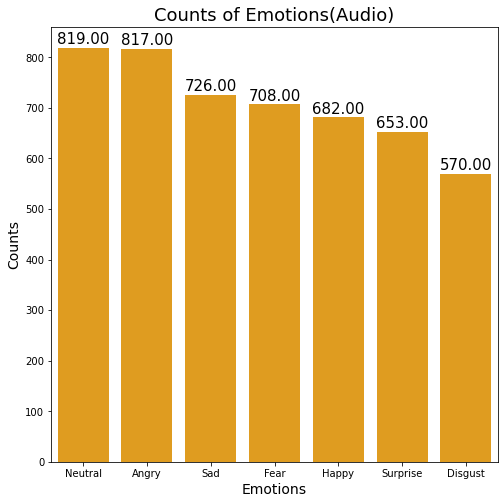

In [38]:
import seaborn as sns
plt.figure(figsize=(8, 8))
plots = sns.barplot(x="Emotions", y="Valuecount", data=df1,color='orange')
for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
        
plt.xlabel("Emotions", size=14)
 
# Setting the label for y-axis
plt.ylabel("Counts", size=14)
 
# Setting the title for the graph
plt.title("Counts of Emotions(Audio)",size=18)
plt.grid(False)
 
# Finally showing the plot
plt.show()        


In [39]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    


In [40]:
from IPython.display import Audio

In [41]:
# data,sampling_rate = librosa.load(path)
# sampling_rate

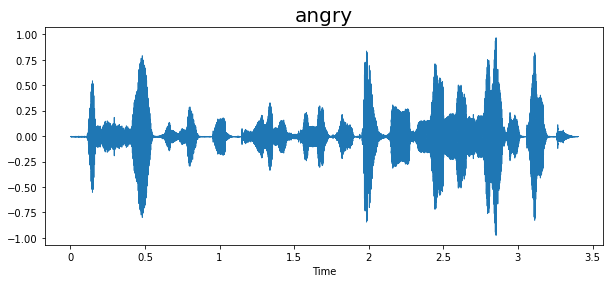

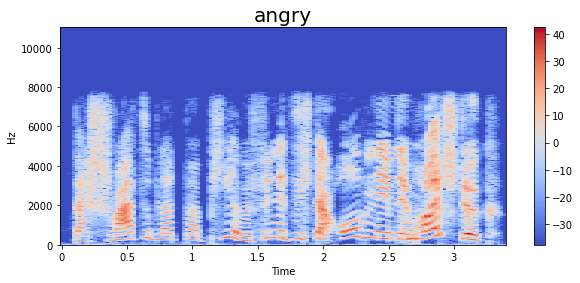

In [42]:
#we can also disply waveplot and specsplot for all the classes  

emotion='angry'
path=df.iat[30,0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


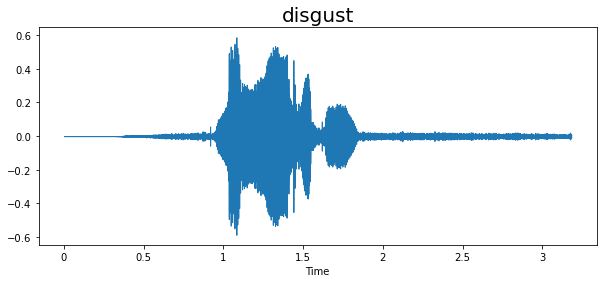

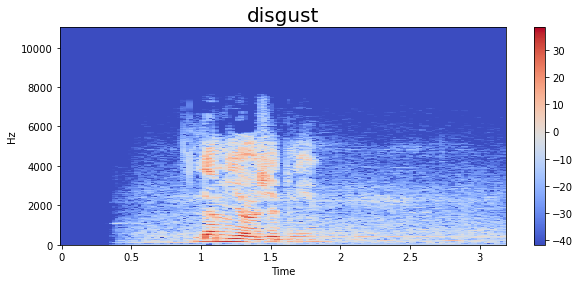

In [43]:
emotion='disgust'
path=df.iat[819,0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


# Augmentation

In [44]:
#adding background noise
def add_white_noise(signal, noise_factor):
    noise = np.random.normal(0,signal.std(),signal.size)
    augmented_data = signal + noise_factor * noise
    # Cast back to same data type
    return augmented_data


In [45]:
if __name__ =="__main__":
    signal,sr = librosa.load(df['speech'][30])
    augmented_signal = add_white_noise(signal,0.5)
    sf.write("augg1.wav",augmented_signal,sr)
   

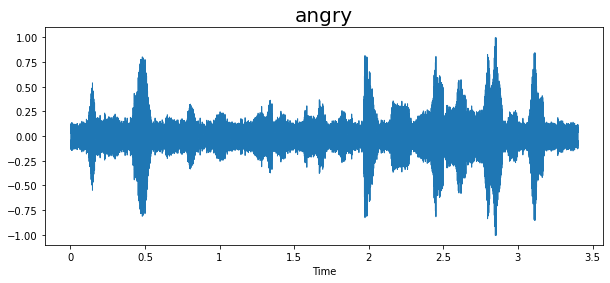

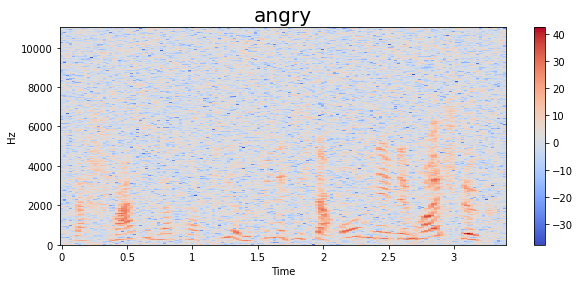

In [46]:
emotion='angry'
data,sampling_rate = librosa.load("augg1.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg1.wav")

In [47]:
#time scaling
def time_stretch(df,stretch_rate):
    return librosa.effects.time_stretch(df,stretch_rate)


In [48]:
if __name__ =="__main__":
    df,sr = librosa.load(df['speech'][30])
    augmented_signal = time_stretch(df,0.5)
    sf.write("augg2.wav",augmented_signal,sr)
   

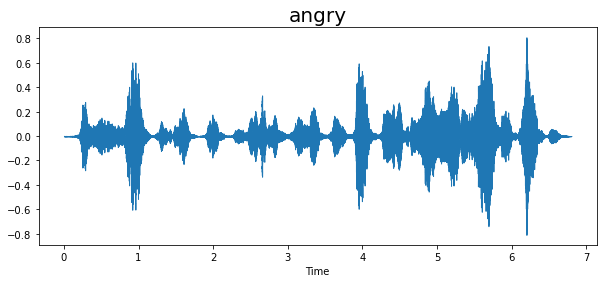

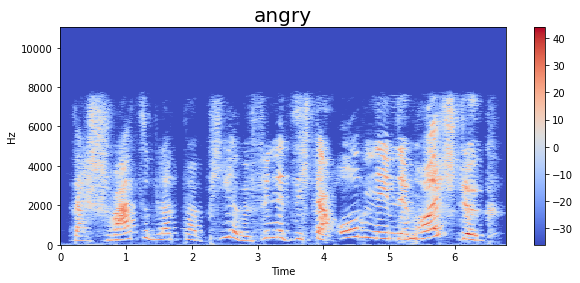

In [49]:
emotion='angry'
data,sampling_rate = librosa.load("augg2.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg2.wav")

In [50]:
#pitch scaling
def pitch_scale(signal,sr,num_semitones):
    return librosa.effects.pitch_shift(signal,sr,num_semitones)

In [51]:
if __name__ =="__main__":
    df,sr = librosa.load('4-m-20-0-2-148.wav')
    augmented_signal = pitch_scale(df,sr,12)
    sf.write("augg3.wav",augmented_signal,sr)

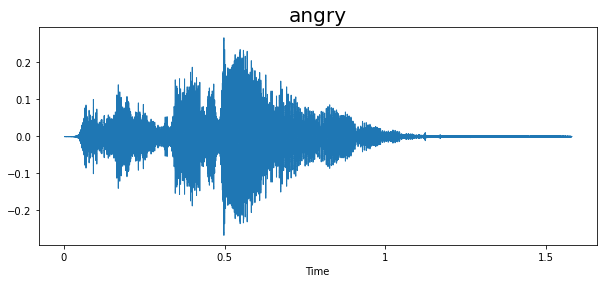

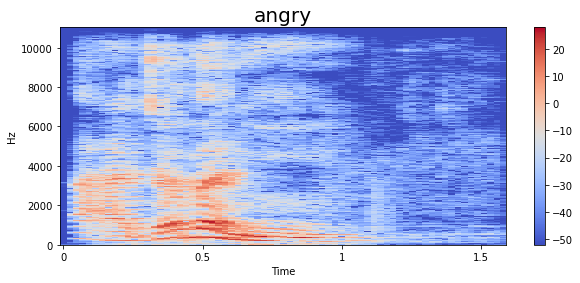

In [52]:
emotion='angry'
data,sampling_rate = librosa.load("augg3.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg3.wav")


In [53]:
#Random gain scaling
import random
def randomg_gain(df,min_gain_factor,max_gain_factor):
    gain_factor = random.uniform(min_gain_factor,max_gain_factor)
    return df * gain_factor

In [54]:
if __name__ =="__main__":
    df,sr = librosa.load('4-m-20-0-2-148.wav')
    augmented_signal = randomg_gain(df,2,6)
    sf.write("augg4.wav",augmented_signal,sr)

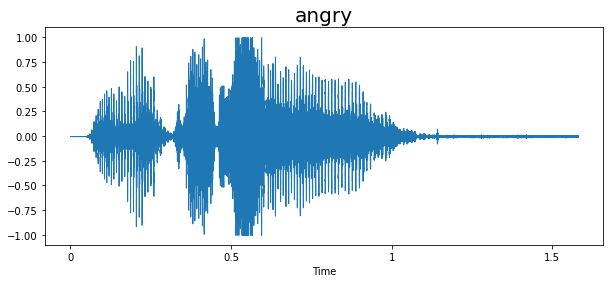

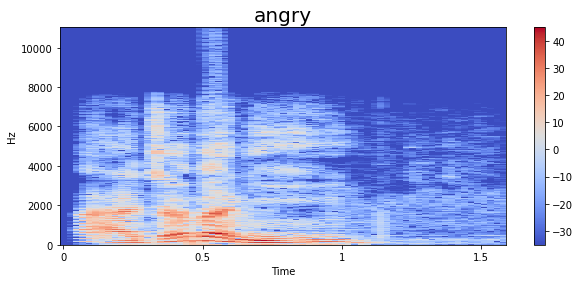

In [55]:
data,sampling_rate = librosa.load("augg4.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg4.wav")


# Feature Extraction

In [56]:
def extract_mfcc(filename):
    y,sr = librosa.load(filename,duration=3,offset=0.5,res_type='kaiser_fast')
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [62]:
extract_mfcc(df['speech'][0])

array([-4.34857483e+02,  1.13806709e+02, -2.80842819e+01,  4.67693253e+01,
       -6.62311971e-01, -1.22168455e+01, -3.68304157e+00, -1.18129387e+01,
       -4.91973448e+00, -2.17101049e+00, -2.66553521e+00, -3.58675033e-01,
       -4.21081686e+00, -9.79485893e+00,  3.86956286e+00, -1.29496419e+00,
       -3.73397255e+00,  9.94346559e-01,  4.32907164e-01, -2.85805488e+00,
       -7.83589125e+00,  1.40436316e+00, -3.91935873e+00, -4.38161612e+00,
        1.18947729e-01, -3.20929813e+00,  1.27311492e+00,  2.34517217e-01,
       -2.20603132e+00, -6.29030049e-01, -1.64104894e-01, -4.18164444e+00,
        4.02297974e-01,  1.11620665e+00, -5.15712023e+00, -1.99951530e+00,
       -3.78106976e+00, -4.57532549e+00, -4.08243942e+00, -4.15722179e+00],
      dtype=float32)

In [63]:
X_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))
X_mfcc

0       [-434.85748, 113.80671, -28.084282, 46.769325,...
1       [-480.92023, 99.43582, -35.679676, 65.717094, ...
2       [-226.69179, 95.11993, -73.66531, 41.528965, -...
3       [-240.40167, 94.57178, -58.944378, 54.096592, ...
4       [-282.79556, 103.31378, -68.86788, 38.481617, ...
                              ...                        
4970    [-262.84146, 115.41763, -2.5604846, 28.536448,...
4971    [-326.23785, 94.4351, 8.209972, 30.855536, -8....
4972    [-301.2211, 81.24696, 0.19075769, 29.471455, 1...
4973    [-262.14603, 98.11836, -5.5850673, 35.08944, -...
4974    [-280.18356, 75.58335, 10.810878, 33.449093, -...
Name: speech, Length: 4975, dtype: object

In [64]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(4975, 40)

In [65]:
X = np.expand_dims(X,-1)
X.shape

(4975, 40, 1)

In [71]:
# to categoriacl
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [72]:
y=y.toarray()

In [73]:
y.shape

(4975, 7)

In [74]:

# y = y
# y.resize((4975,1),refcheck=False)
# y.shape


In [75]:
from sklearn.model_selection import train_test_split

# x_train ,x_test,y_train,y_test = train_test_split(df,test_size=0.2)   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# test_class_proportion = get_class_proportion(X_test)

In [76]:
# get_indexes = lambda x, xs: [i for (1,2) in zip(y_test, range(len(y_test))) if x == y]


In [77]:
# from sklearn.model_selection import cross_validate
# def cross_validation(model, X_train, y_train, _cv=5):
    
#     scoring = ['accuracy']
#     results = cross_validate(estimator=model,
#                                X_train1=X_train,
#                                y_train1=y_train,
#                                cv=_cv,
#                                scoring=scoring,
#                                return_train_score=True)
        
#     return{"Training Accuracy scores": results['train_accuracy'],
#             "Mean Training Accuracy": results['train_accuracy'].mean()*100}   

# K-FOLD CROSS VALIDATION

In [78]:
# import numpy as np
# from sklearn.model_selection import KFold

# X = X
# y = y
# kf = KFold(n_splits=2)

# for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

In [79]:
# kfold = StratifiedKFold(n_splits=N_SPLIT,shuffle=True,random_state=42)

# # Variable for keeping count of split we are executing

# j = 0

# # K-fold Train and test for each split

# for train_idx, val_idx in list(kfold.split(train_x,train_y)):

#     x_train_df = df.iloc[train_idx]

#     x_valid_df = df.iloc[val_idx]

#     j+=1

#     training_set = train_datagen.flow_from_dataframe(dataframe=x_train_df, directory=X_train, class_mode="categorical")


In [80]:
model = Sequential()

model.add(Conv2D(40,(3,3),padding='same',input_shape=(40,1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.10))
          
          
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.10))
          
          
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.10))
          

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.10))
          
model.add(Flatten()) 
          
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))          
          

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))          
          

          
model.add(Dense(7,activation='softmax'))
opt = Adam(lr=0.0005)


checkpoint = ModelCheckpoint("AudioF",monitor='val_accuracy',
                            save_weights_only=True,mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.001,model='auto')

callbacks=[PlotLossesCallback(),checkpoint,reduce_lr]
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()          

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 1, 40)         400       
                                                                 
 batch_normalization (BatchN  (None, 40, 1, 40)        160       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 40, 1, 40)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 1, 40)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 40, 1, 40)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 1, 128)        1

In [81]:
model.save('Audio_.h5')

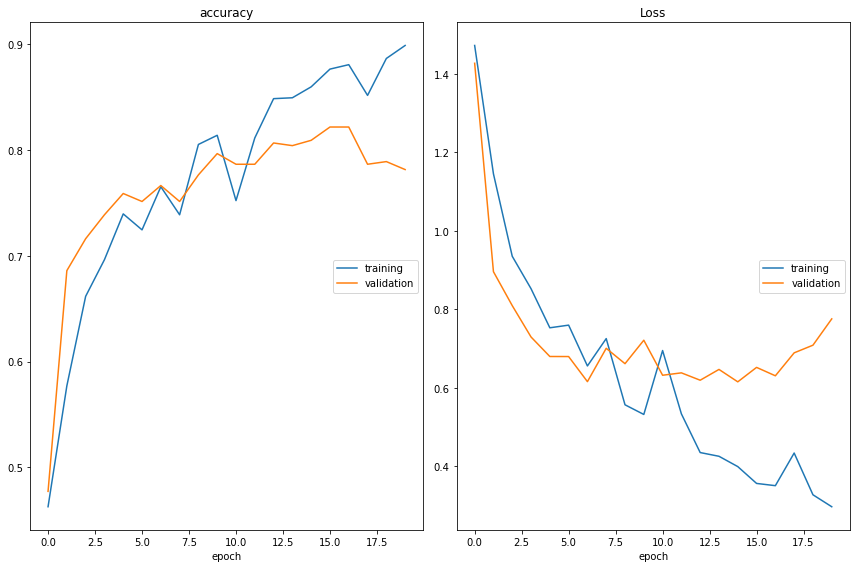

accuracy
	training         	 (min:    0.463, max:    0.899, cur:    0.899)
	validation       	 (min:    0.477, max:    0.822, cur:    0.781)
Loss
	training         	 (min:    0.297, max:    1.473, cur:    0.297)
	validation       	 (min:    0.616, max:    1.427, cur:    0.776)

Epoch 00020: saving model to AudioF
359/359 [==============================] - 64s 177ms/step - loss: 0.2974 - accuracy: 0.8987 - val_loss: 0.7760 - val_accuracy: 0.7814 - lr: 5.0000e-04


In [82]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=20,batch_size=10,shuffle=True,callbacks=callbacks)


In [84]:
test_loss, test_acc = model.evaluate(X_test, y_test)

32/32 [==============================] - 2s 76ms/step - loss: 0.6046 - accuracy: 0.8251


In [85]:
y_pred = model.predict(X_test)

y_pred

array([[6.3489874e-06, 6.8950380e-05, 6.4354623e-07, ..., 2.0721480e-07,
        5.5422440e-08, 9.9628121e-01],
       [8.8974906e-05, 9.9933439e-01, 2.1633874e-05, ..., 4.4451699e-06,
        8.7044400e-06, 3.2628022e-04],
       [4.8704044e-04, 1.9030189e-04, 2.1195754e-03, ..., 1.0857044e-03,
        9.9565542e-01, 1.7816294e-04],
       ...,
       [5.1722903e-04, 5.3835786e-03, 7.3296578e-05, ..., 1.5414472e-01,
        1.5315625e-05, 7.6326111e-04],
       [2.5071033e-08, 2.1115503e-09, 9.9999988e-01, ..., 1.8208324e-09,
        2.5921834e-09, 8.6513330e-10],
       [4.4240187e-05, 7.8089163e-04, 3.2780429e-07, ..., 9.9904102e-01,
        3.4595374e-07, 5.3418073e-05]], dtype=float32)

In [86]:
lab=df['label'].unique()
lab

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'],
      dtype=object)

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics




y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[119   4   7   5   7   0   3]
 [  5  92   1   6   3   2   4]
 [  3   2 133   5   5   4   7]
 [  4   7  10 107   3   3   9]
 [  2   0   6   2 145   3  12]
 [  0   2   4   6   2 134   2]
 [  4   3   4   7   2   4  91]]


In [88]:
data=pd.DataFrame(cm)
# data2=data.rename(columns={'0':'Angry','1':'Disgust','2':'Fear','3':'Happy','4':'Neutral','5':'Sad','6':'Surprise'},inplace=True)
data.columns = ['Angry', 'Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
data.index = ['Angry(TP)', 'Disgust(FN)', 'Fear(FN)', 'Happy(FN)','Neutral(FN)','Sad(FN)','Surprise(FN)']
data

,Angry,Disgust,Fear,Happy,Neutral,Sad,Surprise
Angry(TP),119,4,7,5,7,0,3
Disgust(FN),5,92,1,6,3,2,4
Fear(FN),3,2,133,5,5,4,7
Happy(FN),4,7,10,107,3,3,9
Neutral(FN),2,0,6,2,145,3,12
Sad(FN),0,2,4,6,2,134,2
Surprise(FN),4,3,4,7,2,4,91


In [89]:
df=data.index

Text(0.5, 1.0, 'Sensitivity Plot')

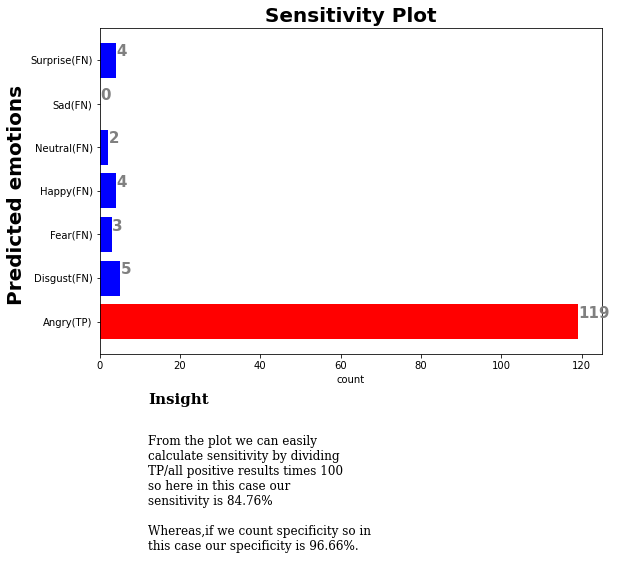

In [129]:
from matplotlib import pyplot as plt

# data1 = {'Angry(TP)':128, 'Disgust(FN)':7, 'Fearv(FN)':5,'Happy(FN)':5,'Neutral(FN)':4,'Sad(FN)':3,'Surprise(FN)':6}
# key=list(data1.keys())
# val=list(data1.values())
fig, ax = plt.subplots(figsize =(9, 6))
fig.text(0.2, 0.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.2, -0.37, '''
From the plot we can easily 
calculate sensitivity by dividing
TP/all positive results times 100
so here in this case our 
sensitivity is 84.76% 

Whereas,if we count specificity so in
this case our specificity is 96.66%.
 '''
         , fontsize=12, fontweight='light', fontfamily='serif',verticalalignment='bottom')
ax.barh(df,data['Angry'],color=['Red','Blue','Blue','Blue','Blue','Blue','Blue'])
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 15, fontweight ='bold',
             color ='grey')
 
plt.grid(False)
plt.xlabel("count")
plt.ylabel("Predicted emotions ",fontsize=20,fontweight='bold')
plt.title("Sensitivity Plot",fontweight='bold',fontsize=20)
 

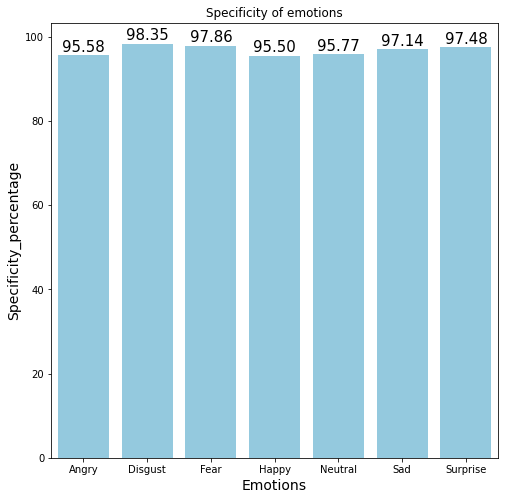

In [132]:

data = {"Emotions": ["Angry", "Disgust", "Fear", "Happy","Neutral","Sad","Surprise"],
        "Specificity_percentage": [95.58, 98.35, 97.86, 95.50,95.77,97.14,97.48]}

df = pd.DataFrame(data, columns=['Emotions', 'Specificity_percentage'])
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Emotions", y="Specificity_percentage", data=df,color='skyblue')
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Emotions", size=14)
 
# Setting the label for y-axis
plt.ylabel("Specificity_percentage", size=14)
 
# Setting the title for the graph
plt.title("Specificity of emotions")
 
# Finally showing the plot
plt.show()

# Sensetivity plot

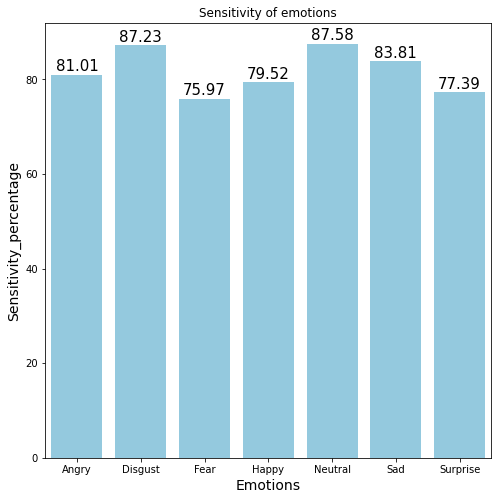

In [139]:
data = {"Emotions": ["Angry", "Disgust", "Fear", "Happy","Neutral","Sad","Surprise"],
        "Sensitivity_percentage": [81.01, 87.23, 75.97, 79.52,87.58,83.81,77.39]}

df = pd.DataFrame(data, columns=['Emotions', 'Sensitivity_percentage'])
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Emotions", y="Sensitivity_percentage", data=df,color='skyblue',linewidth=20)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Emotions", size=14)
 
# Setting the label for y-axis
plt.ylabel("Sensitivity_percentage", size=14)
 
# Setting the title for the graph
plt.title("Sensitivity of emotions")
 
# Finally showing the plot
plt.show()

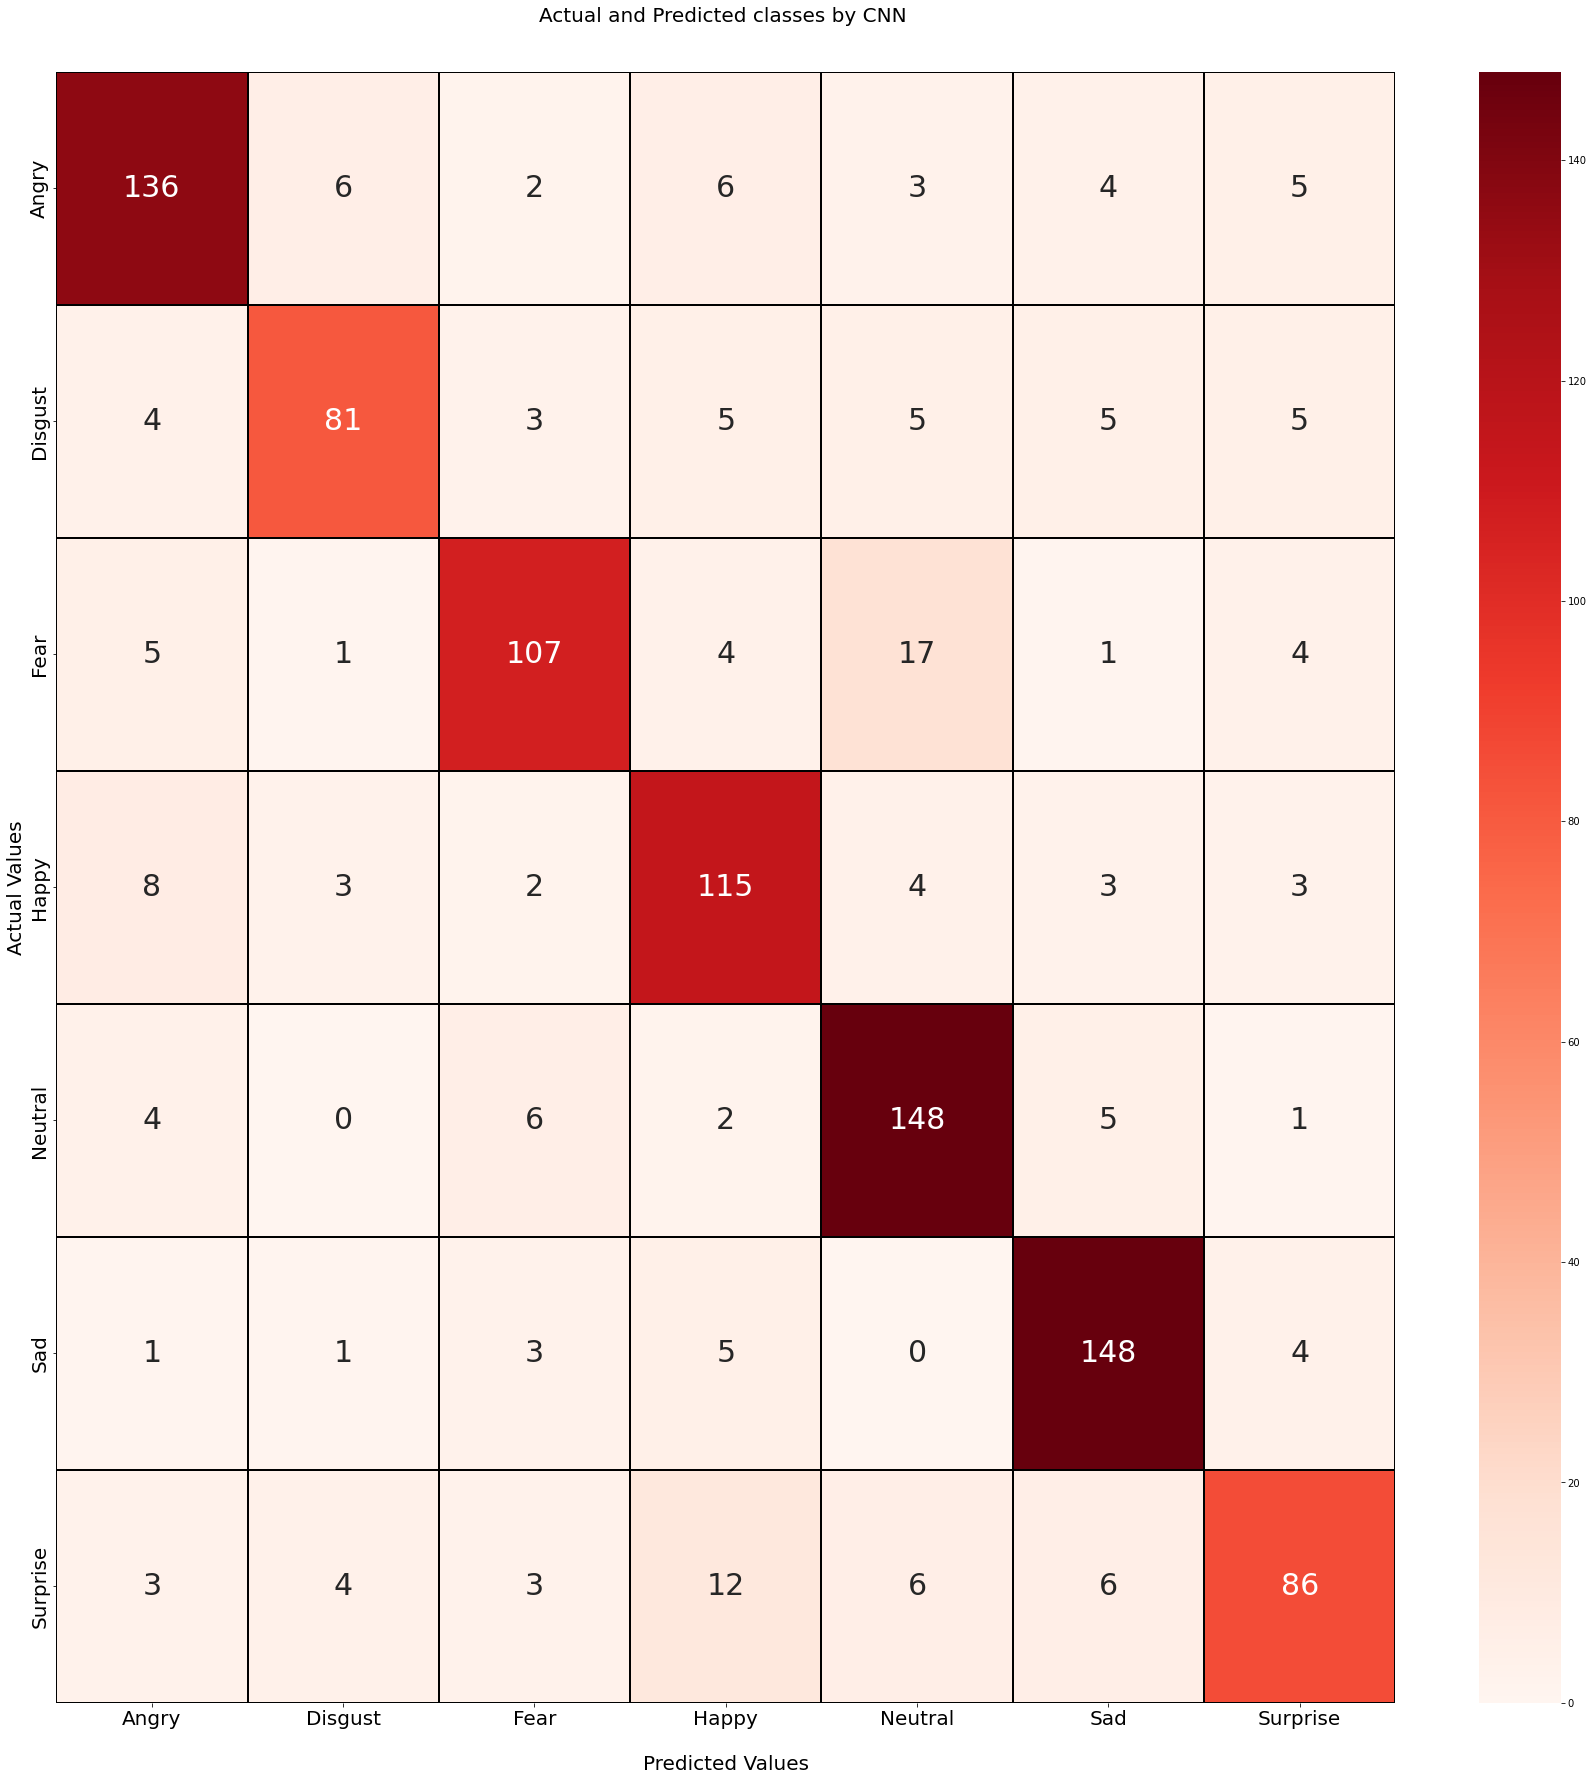

In [254]:

import seaborn as sns
f,ax = plt.subplots(1,1,figsize=(30,30))
ax = sns.heatmap(cm, annot=True, cmap='Reds',ax=ax,annot_kws={"size": 30}, fmt='g',linewidths=0.1, linecolor='black')

ax.set_title('Actual and Predicted classes by CNN \n\n',fontsize = 20);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values',fontsize = 20);


ax.xaxis.set_ticklabels(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']); ax.yaxis.set_ticklabels(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']);
ax.tick_params(labelsize=20)
# ## Display the visualization of the Confusion Matrix.
# plt.show()


In [255]:
# Print the accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,average = 'macro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'))
print("f1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'))

0.8251256281407036
Precision Score :  0.8249990726588491
Recall Score :  0.8163481224964568
f1 Score :  0.8191306934128736


In [264]:
#Auc 
# import sklearn

# y_pred_proba = tree.predict_proba(X_test)

In [266]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# # Compute ROC curve and ROC area for each class

# roc_auc_score(y_test,y_pred,multi_class = "ovr")


In [267]:
import pandas as pd

df2 = pd.DataFrame([['Angry', 130,   7,   2,   5,   5,   3,   2], ['Disgust',  9, 108,   1,  10,   0,   2,   0], ['Fear',  7 ,  3,  95,   4,   8,   4,   0],
                   ['Happy', 5,   2,   2, 112,   3,   4,   7],['Neutral', 2,   1,   6,   2, 146,   6,   6],['Sad',3,   4,   3,   3,   0, 134,   2],['Surprise',11,  10,   3,  11,   7,   5,  90]],
                  columns=['Predictedclasses','Angry', 'Disgust', 'Fear', 'Happy', 'Neutral','sad','Surprise'])


# index=df2.index
# for i in index:
#     print(i)
 

# Stacked bar plot of precision count

In [269]:
# import matplotlib.pyplot as plt



# df2.plot(x='Predictedclasses', kind='bar', stacked=True,
#         title='Stacked Bar Graph of predicted count of each classes',figsize=(18,10))


In [ ]:
# #Serialize the model and save
# import joblib
# joblib.dump(model, 'mixcnn.pkl')
# print("CNN Model Saved")
# #Load the model
# lr = joblib.load('mixcnn.pkl')
# # Save features from training
# rnd_columns = list(X.columns)
# joblib.dump(rnd_columns, 'rnd_columns.pkl')
# print("Random Forest Model Colums Saved")

In [274]:
from keras.models import Sequential
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1),activation='tanh',recurrent_activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",go_backwards=True,dropout=0.8,
    recurrent_dropout=0.6,),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
    
])


checkpoint = ModelCheckpoint("Audio.h5",monitor='val_accuracy',
                            save_weights_only=True,mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.1,model='auto')

callbacks=[PlotLossesCallback(),checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 123)               61500     
                                                                 
 dense_12 (Dense)            (None, 512)               63488     
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dropout_16 (Dropout)        (None, 256)              

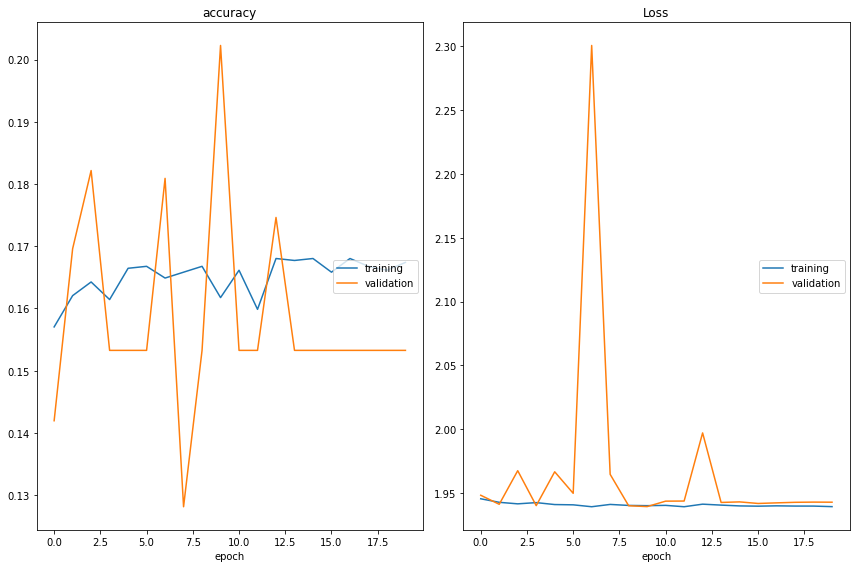

accuracy
	training         	 (min:    0.157, max:    0.168, cur:    0.167)
	validation       	 (min:    0.128, max:    0.202, cur:    0.153)
Loss
	training         	 (min:    1.939, max:    1.946, cur:    1.939)
	validation       	 (min:    1.939, max:    2.301, cur:    1.943)

Epoch 00020: saving model to Audio.h5
160/160 [==============================] - 6s 40ms/step - loss: 1.9394 - accuracy: 0.1674 - val_loss: 1.9429 - val_accuracy: 0.1533 - lr: 0.0010


In [275]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=20,batch_size=20,shuffle=True,callbacks=callbacks)

In [276]:
test_loss, test_acc = model.evaluate(X_test, y_test)

ValueError: in user code:

    File "C:\Users\harsh\anaconda3\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\harsh\anaconda3\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\harsh\anaconda3\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\harsh\anaconda3\lib\site-packages\keras\engine\training.py", line 1305, in test_step
        self.compiled_loss(
    File "C:\Users\harsh\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\harsh\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\harsh\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\harsh\anaconda3\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\harsh\anaconda3\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 7) are incompatible


In [ ]:
y_pred = model.predict(X_test)

y_pred

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics



y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)



In [ ]:
import seaborn as sns
f,ax = plt.subplots(1,1,figsize=(30,30))
ax = sns.heatmap(cm, annot=True, cmap='Reds',ax=ax,annot_kws={"size": 30}, fmt='g',linewidths=0.1, linecolor='black')

ax.set_title('Actual and Predicted classes by CNN \n\n',fontsize = 20);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values',fontsize = 20);


ax.xaxis.set_ticklabels(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']); ax.yaxis.set_ticklabels(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']);
ax.tick_params(labelsize=20)
# ## Display the visualization of the Confusion Matrix.
# plt.show()


In [ ]:
# Print the accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,average = 'macro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'))
print("f1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'))

# Matrix score Comparesion of CNN and LSTM 

In [303]:
from matplotlib import pyplot as plt

d = {'LSTM':[0.44,0.2661,0.45,0.3096] ,'CNN':[0.8251,0.8249,0.8163,0.8191]}

g={'Accuracy','Precision','Recall','F1'}


df = pd.DataFrame(data=d,index=g)

df

,LSTM,CNN
Recall,0.4400,0.8251
F1,0.2661,0.8249
Accuracy,0.4500,0.8163
Precision,0.3096,0.8191


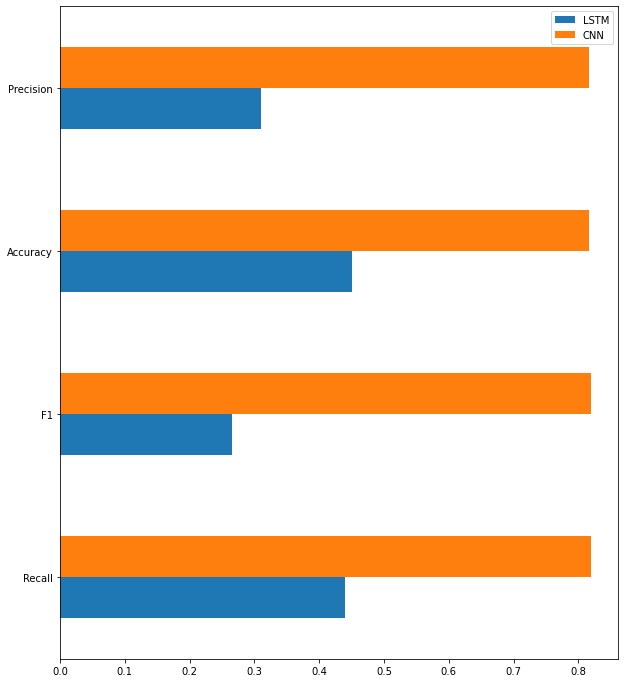

In [200]:
import matplotlib.pyplot as plot
import pandas as pd
# plot.figure(figsize=(20,20))

df = pd.DataFrame(df,columns=['LSTM','CNN'], index = ['Recall','F1','Accuracy','Precision'])

# Multiple horizontal bar chart
# fig, ax = plt.subplots()
df.plot.barh()

# for p in plot.patches:
#     plot.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    size=15,
#                    xytext = (0, -12), 
#                    textcoords = 'offset points')

fig.tight_layout()
plt.gcf().set_size_inches(10, 12)

# plt.bar_label(h, padding=3)
# plt.bar_label(rects2, padding=3)

# Display
plt.legend(df.columns, loc='upper right')
plt.show()

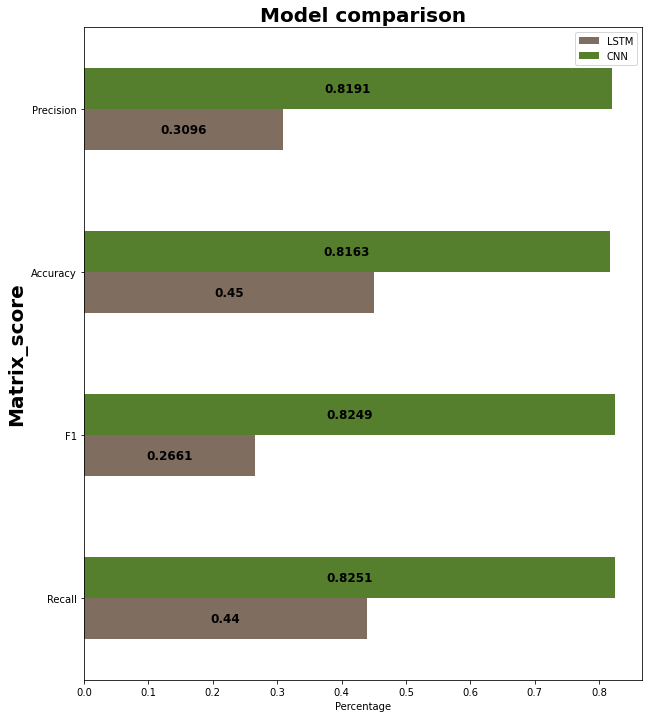

In [302]:
import matplotlib.pyplot as plot
ax = df.plot.barh( figsize=(10, 12), rot=0,ylabel='Matrix_score', color=['#7f6d5f', '#557f2d'])

# iterate through each group of container (bar) objects
for c in ax.containers:

    # annotate the container group
    ax.bar_label(c, label_type='center',fontweight='bold',fontsize=12)
plt.xlabel("Percentage")
plt.ylabel("Matrix_score",fontsize=20,fontweight='bold')
# plt.ytick("Accuracy",fontsize=20,fontweight='bold')
plt.title("Model comparison",fontweight='bold',fontsize=20)
plt.legend(df.columns, loc='upper right')
plt.show()